In [1]:
import sys


sys.path.append('../common_code')

# # for reading datafiles 
import pandas as pd
# import script that has many standard functions:
from PostProcessingScripts import * 

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


obtain index of the SFRD models that we want to highlight


/var/folders/lc/vg4hc2nn2pn05y4lw3h5wmpm0000gn/T/ipykernel_3719/3290726233.py:11: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:

# GWTC-1, GWTC-2.1, GWTC-3
BBH_list = ['GW150914', 'GW151012', 'GW151226', 'GW170104', 'GW170608', 'GW170729', 'GW170809', 'GW170814', 'GW170818', 'GW170823', 'GW190403_051519', 'GW190408_181802', 'GW190412', 'GW190413_052954', 'GW190413_134308', 'GW190421_213856', 'GW190426_190642', 'GW190503_185404', 'GW190512_180714', 'GW190513_205428', 'GW190514_065416', 'GW190517_055101', 'GW190519_153544', 'GW190521', 'GW190521_074359', 'GW190527_092055', 'GW190602_175927', 'GW190620_030421', 'GW190630_185205', 'GW190701_203306', 'GW190706_222641', 'GW190707_093326', 'GW190708_232457', 'GW190719_215514', 'GW190720_000836', 'GW190725_174728', 'GW190727_060333', 'GW190728_064510', 'GW190731_140936', 'GW190803_022701', 'GW190805_211137', 'GW190814', 'GW190828_063405', 'GW190828_065509', 'GW190910_112807', 'GW190915_235702', 'GW190916_200658', 'GW190917_114630', 'GW190924_021846', 'GW190925_232845', 'GW190926_050336', 'GW190929_012149', 'GW190930_133541', 'GW191103_012549', 'GW191105_143521', 'GW191109_010717', 'GW191113_071753', 'GW191126_115259', 'GW191127_050227', 'GW191129_134029', 'GW191204_110529', 'GW191204_171526', 'GW191215_223052', 'GW191216_213338', 'GW191222_033537', 'GW191230_180458', 'GW200112_155838', 'GW200128_022011', 'GW200129_065458', 'GW200202_154313', 'GW200208_130117', 'GW200208_222617', 'GW200209_085452', 'GW200210_092255', 'GW200216_220804', 'GW200219_094415', 'GW200220_061928', 'GW200220_124850', 'GW200224_222234', 'GW200225_060421', 'GW200302_015811', 'GW200306_093714', 'GW200308_173609', 'GW200311_115853', 'GW200316_215756', 'GW200322_091133']

BNS_list = ['GW170817', 'GW190425']

BHNS_list = ['GW190426_152155', 'GW190917_114630', 'GW200105', 'GW200115']


In [3]:
import datetime 


fmt = 'GW%y%m%d'


GW_ = ['GW190521']


# _%H%M%S
trystr = '190521'



strptime_BBHs = []
for GW_ in BBH_list:
    
    d2 = datetime.datetime.strptime(GW_.split('_')[0], fmt)
    d2 = d2.year + d2.month/12.
    strptime_BBHs.append(d2)
       
strptime_BHNSs = []
for GW_ in BHNS_list:
    
    d2 = datetime.datetime.strptime(GW_.split('_')[0], fmt)
    d2 = d2.year + d2.month/12.
    strptime_BHNSs.append(d2)    


strptime_BNSs = []
for GW_ in BNS_list:
    
    d2 = datetime.datetime.strptime(GW_.split('_')[0], fmt)
    d2 = d2.year + d2.month/12.
    strptime_BNSs.append(d2)  
    
    
    
    
today = datetime.datetime.now()
today = today.year + today.month/12.
print(today)
import matplotlib.dates as mdates




2023.1666666666667


In [4]:
print(strptime_BNSs)

[2017.6666666666667, 2019.3333333333333]


In [5]:
def cumhist(data, reverse=False, mark=None, ax=None, **kwargs):
    """
    Plot a cumulative histogram of `data`, optionally with certain indices marked with an x.

    Parameters
    ----------
    data : array-like
        Data to include in the histogram
    reverse : bool, optional
        If False (default), the histogram increases with increasing `data`. If True, it decreases with increasing `data`
    mark : array-like, optional
        An array of indices to mark with an x
    ax : matplotlib.pyplot.axes, optional
        Axis on which to plot the confusion matrix. Default: current axis.
    kwargs : dict, optional
        Keyword arguments to be passed to `matplotlib.pyplot.step`

    Returns
    -------
    p : list
        The list of `matplotlib.lines.Line2D` objects returned by `matplotlib.pyplot.step`
    """
    if mark is None:
        mark = np.zeros(len(data), bool)
    if ax is None:
        ax = plt.gca()
    i = np.argsort(data)
    x = data[i]
    mark = mark[i]
    x = np.append(x, x[-1])
    y = np.linspace(0., x.size, x.size) -1
    if reverse:
        y = y[::-1]
    p = ax.step(x, y, **kwargs)
    ax.scatter(data[i][mark], (y[:-1] + 0.5 * np.diff(y))[mark], marker='x')
    return p





In [6]:
# f, axe= plt.subplots(ncols=1,nrows=1,figsize=(24,10))









# xlabel = 'time'
# ylabel = r'\textbf{Size of Gravitational Wave Catalog}'

# axe = layoutAxes(axe, nameX=xlabel, nameY=ylabel, setMinor=False, fontsize=fs-2)


# # xx = np.linspace(2015, 2040)

# # x_BBHs = strptime_BBHs




# axe.hist(x_BBHs, cumulative=True, histtype='step', lw=5)

# # axe.set_xticks([datetime.datetime(2015,1,1), datetime.datetime(2020,1,1), datetime.datetime(2025,1,1)])

# axe.xaxis.set_major_locator(mdates.YearLocator(5))
# axe.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
# axe.set_xlim(datetime.datetime(2014,12,1), datetime.datetime(2035,12,1))


# # O4_dates = np.linspace(datetime.datetime(2023,3,1), datetime.datetime(2024,3,1))
# # print(O4)

# # axe.set_yscale('log')

# plt.show()

In [7]:
# f, axe= plt.subplots(ncols=1,nrows=1,figsize=(24,10))









# xlabel = 'time'
# ylabel = r'\textbf{Size of Gravitational Wave Catalog}'

# axe = layoutAxes(axe, nameX=xlabel, nameY=ylabel, setMinor=False, fontsize=fs-2)


# # xx = np.linspace(2015, 2040)

# x_BBHs = strptime_BBHs




# axe.hist(x_BBHs, cumulative=True, histtype='step', lw=5)

# # axe.set_xticks([datetime.datetime(2015,1,1), datetime.datetime(2020,1,1), datetime.datetime(2025,1,1)])

# axe.xaxis.set_major_locator(plt.MultipleLocator(5))
# # axe.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
# axe.set_xlim(2014, 2035)




# O4_dates = np.linspace(2023+(3/12), 2024+(3/12), 10)
# axe.plot([O4_dates[0], O4_dates[-1]], [len(x_BBHs), len(x_BBHs)+200], lw=3, c='orange')




# # print(O4)

# # axe.set_yscale('log')

# plt.show()

In [8]:

## BBH
numberO3end = len(strptime_BBHs) # number BBHs at end of O3
numberO4end = numberO3end + 180
numberO5end = numberO4end + 4*180 
numbersVoyend = numberO5end + 100*180
numbersCEend = numbersVoyend + 1E4*180 
numbers_BBH = [numberO3end, numberO3end, numberO4end, numberO4end, numberO5end, numberO5end, numbersVoyend, numbersVoyend, numbersCEend, numbersCEend]

# up and down limits
# O4_BBH_up = 180
# O4_BBH_down = -44
# numbers_BBH_up = [numberO3end, numberO3end, numberO4end+0.5*(numberO4end), numberO4end+0.5*(numberO4end), numberO5end+0.5*(numberO5end),\
#                   numberO5end+0.5*(numberO5end),  numbersCEend+0.5*(numbersCEend), numbersCEend+0.5*(numbersCEend)]
# numbers_BBH_down = [numberO3end, numberO3end, numberO4end-0.5*(numberO4end), numberO4end-0.5*(numberO4end), numberO5end-0.5*(numberO5end),\
#                   numberO5end-0.5*(numberO5end),  numbersCEend-0.5*(numbersCEend), numbersCEend-0.5*(numbersCEend)]

## BHNS
numberO3end = len(strptime_BHNSs) # number BBHs at end of O3
numberO4end = numberO3end + 12
numberO5end = numberO4end + 4*12
numbersVoyend = numberO5end + 100*12
numbersCEend = numbersVoyend + 1E4*12 
numbers_BHNS = [numberO3end, numberO3end, numberO4end, numberO4end, numberO5end, numberO5end, numbersVoyend, numbersVoyend, numbersCEend, numbersCEend]

# O4_BHNS_up = 12
# O4_BHNS_down = -4
# numbers_BHNS_up = [numberO3end, numberO3end, numberO4end+0.5*(numberO4end), numberO4end+0.5*(numberO4end), numberO5end+0.5*(numberO5end),\
#                   numberO5end+0.5*(numberO5end),  numbersCEend+0.5*(numbersCEend), numbersCEend+0.5*(numbersCEend)]
# numbers_BHNS_down = [numberO3end, numberO3end, numberO4end-0.5*(numberO4end), numberO4end-0.5*(numberO4end), numberO5end-0.5*(numberO5end),\
#                   numberO5end-0.5*(numberO5end),  numbersCEend-0.5*(numbersCEend), numbersCEend-0.5*(numbersCEend)]



## BNS 
numberO3end = len(strptime_BNSs) # number BBHs at end of O3
numberO4end = numberO3end + 5
numberO5end = numberO4end + 4*5
numbersVoyend = numberO5end + 100*5
numbersCEend = numbersVoyend + 1E4*5
numbers_BNS = [numberO3end, numberO3end, numberO4end, numberO4end, numberO5end, numberO5end, numbersVoyend, numbersVoyend, numbersCEend, numbersCEend]

# O4_BNS_up = 5
# O4_BNS_down = -5
# numbers_BNS_up = [numberO3end, numberO3end, numberO4end+0.5*(numberO4end), numberO4end+0.5*(numberO4end), numberO5end+0.5*(numberO5end),\
#                   numberO5end+0.5*(numberO5end),  numbersCEend+0.5*(numbersCEend), numbersCEend+0.5*(numbersCEend)]
# numbers_BNS_down = [numberO3end, numberO3end, numberO4end-0.5*(numberO4end), numberO4end-0.5*(numberO4end), numberO5end-0.5*(numberO5end),\
#                   numberO5end-0.5*(numberO5end),  numbersCEend-0.5*(numbersCEend), numbersCEend-0.5*(numbersCEend)]

# ####


O3end = 2020 +(4/12)
O4begin= 2023+(3/12)
O4end = 2024+(3/12)
O5begin = 2026
O5end = 2028

Voy_begin = 2030
Voy_end = 2034

ET_CEbegin = 2035
ET_CEend = 2040
dates = [O3end, O4begin, O4end, O5begin, O5end, Voy_begin, Voy_end, ET_CEbegin, ET_CEend]

print(numbers_BHNS)


import seaborn as sns

colors = sns.color_palette("husl", 15)



[4, 4, 16, 16, 64, 64, 1264, 1264, 121264.0, 121264.0]


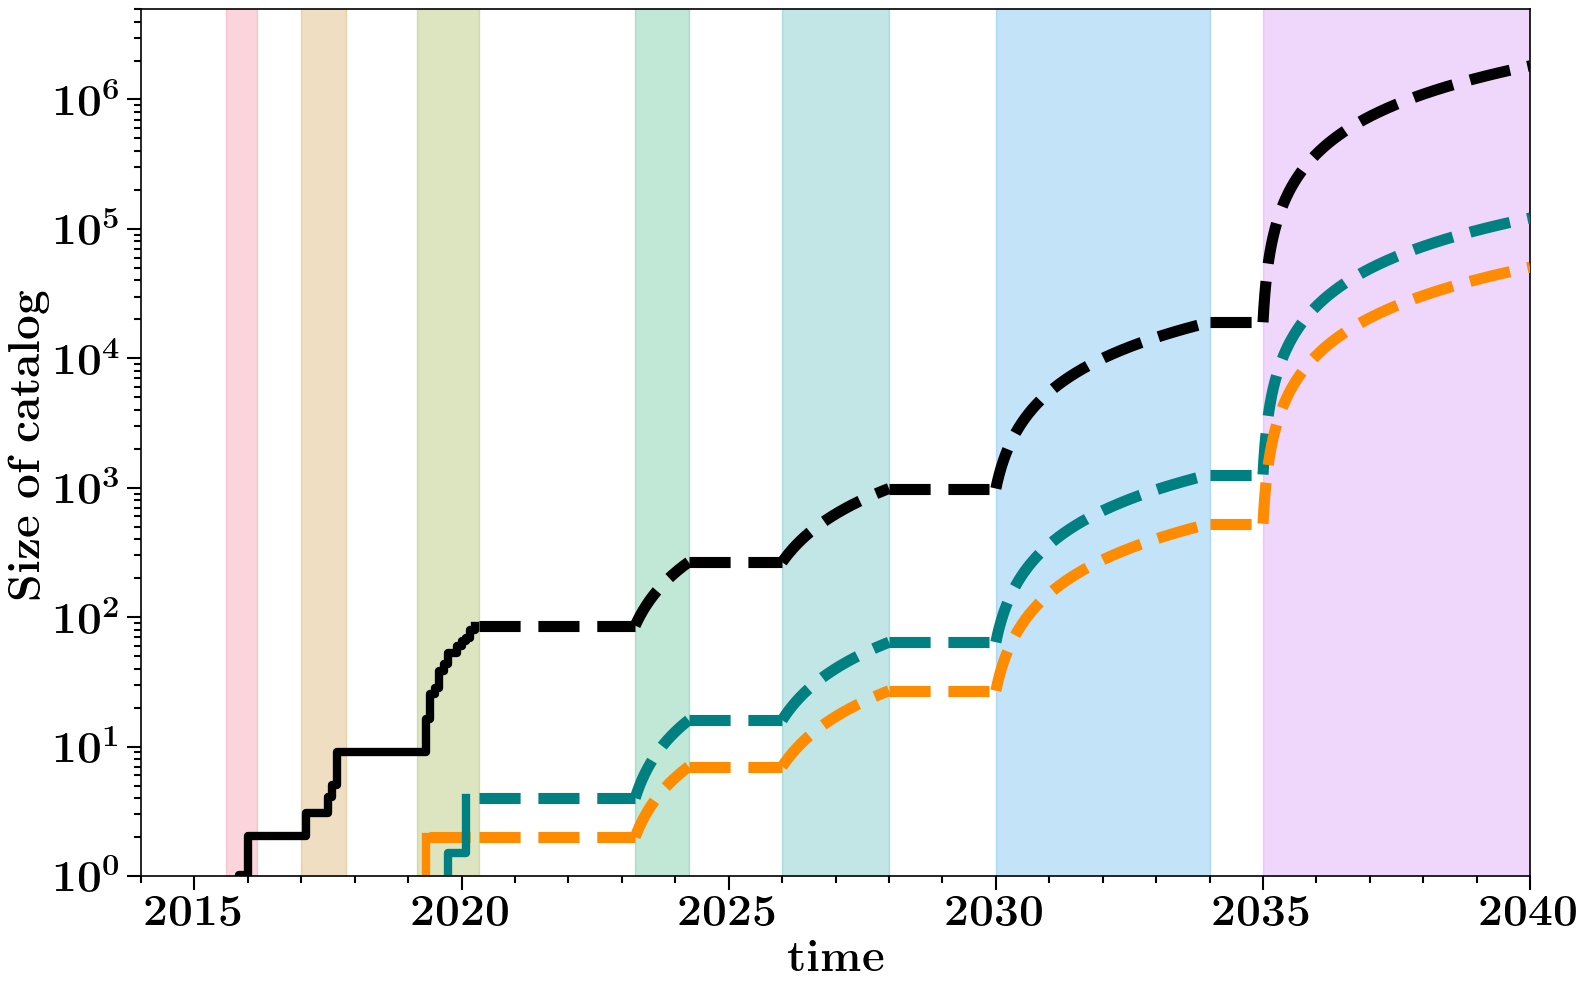

In [9]:
f, axe= plt.subplots(ncols=1,nrows=1,figsize=(16,10))




# data_ = np.concatenate((np.asarray(x_BBHs), O4))

O1begin = 2015+((7)/12) 
O1end = 2016 +((2)/12) 
O2begin = 2017 + ((0)/12)
O2end = 2017 + ((10)/12)
O3begin = 2019 + ((2)/12)



ET_CEbegin = 2035
ET_CEend = 2040

all_dates = [O1begin, O1end, O2begin, O2end, O3begin, O3end, O4begin, O4end, O5begin, O5end, Voy_begin, Voy_end, ET_CEbegin, ET_CEend]

DCOnumberslist = [numbers_BBH, numbers_BHNS, numbers_BNS]
DCOcolors = ['k',  'teal', 'darkorange']
detectionlist = [strptime_BBHs,  strptime_BHNSs,  strptime_BNSs]
# DCOnumberslist_up = [numbers_BBH_up, numbers_BHNS_up, numbers_BNS_up]
# DCOnumberslist_down = [numbers_BBH_down, numbers_BHNS_down, numbers_BNS_down]

for ind_DCO, DCOdetections in enumerate(detectionlist):
    cumhist(data=np.asarray(DCOdetections), c=DCOcolors[ind_DCO], lw=6)




for ind_d, line in enumerate(dates[:-1]):
    x_ = np.linspace(dates[ind_d], dates[ind_d+1], 1000)
    
    for ind_DCO, DCOlist in enumerate(DCOnumberslist):
        y_ = np.linspace(DCOlist[ind_d], DCOlist[ind_d+1], 1000)
        axe.plot(x_, y_, c=DCOcolors[ind_DCO], lw=8, ls='--', zorder=10)
        # plot error bars
#         y1_ = np.linspace(DCOnumberslist_down[ind_DCO][ind_d], DCOnumberslist_down[ind_DCO][ind_d+1], 1000)
#         y2_ = np.linspace(DCOnumberslist_up[ind_DCO][ind_d], DCOnumberslist_up[ind_DCO][ind_d+1], 1000)
#         axe.fill_between(x_, y1=y1_, y2=y2_, color=DCOcolors[ind_DCO], alpha=0.5)

        
    
## fix BNS disconecction due to no detections 
xx = np.linspace(2019.4, 2020.5, 10)
yy = np.linspace(numbers_BNS[0], numbers_BNS[0], 10)
axe.plot(xx, yy, c=DCOcolors[2], lw=8, ls='--', zorder=1)
        
# fill between detector runs
for ind_d, line in enumerate(all_dates[:-1]):
    if (ind_d%2)==0:
        axe.fill_between(x=[all_dates[ind_d], all_dates[ind_d+1]], y1=[0.001, 0.001], y2=[1E8,1E8], alpha=0.3, color=colors[ind_d], zorder=0)
    

    

# print line today 
# x_today = np.linspace(today, today, 100)
# y_today = np.linspace(1, 5*1E6, 100)
# axe.plot(x_today, y_today, lw=2, ls='-.', color='gray')

    
    
axe.set_ylim(1,5*1E6)    
axe.set_yscale('log')

axe.xaxis.set_major_locator(plt.MultipleLocator(5))
axe.xaxis.set_minor_locator(plt.MultipleLocator(1))
axe.set_xlim(2014, 2040)


xlabel =  r'\textbf{time}'
ylabel = r'\textbf{Size of catalog}'

axe = layoutAxes(axe, nameX=xlabel, nameY=ylabel, setMinor=False, fontsize=fs+8)


plt.tight_layout()

plt.savefig('./GWcatalogSize.png', dpi=600, transparent=False)
plt.savefig('./GWcatalogSize.pdf', transparent=False) 



plt.show()

# only observations 

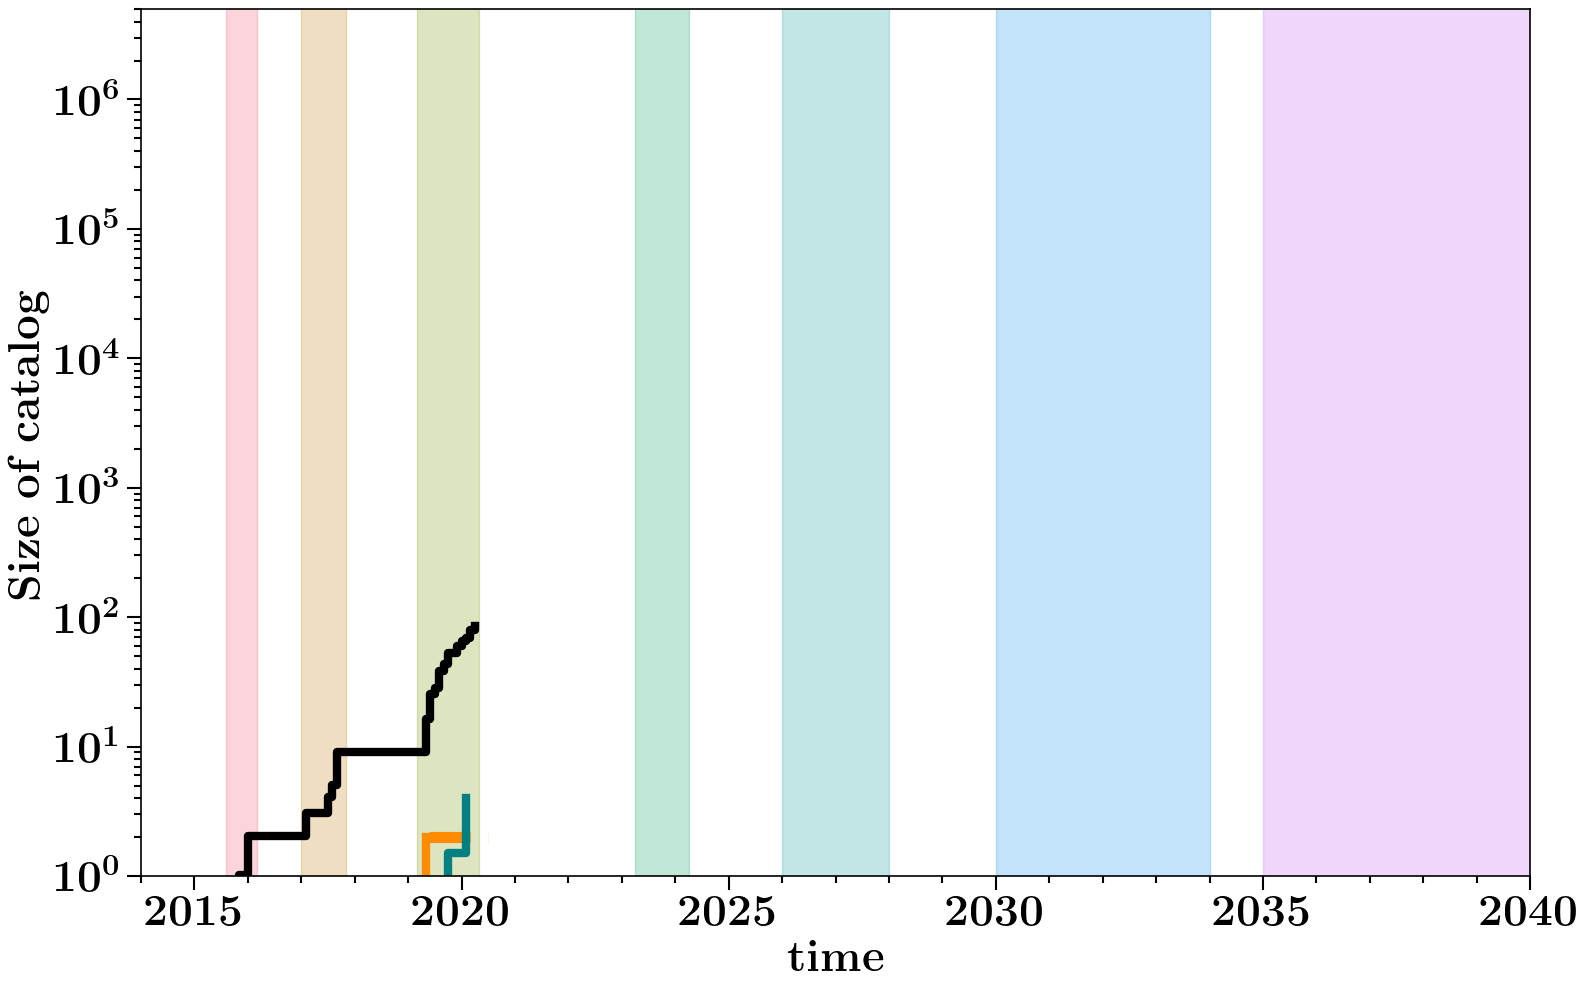

In [10]:
f, axe= plt.subplots(ncols=1,nrows=1,figsize=(16,10))




# data_ = np.concatenate((np.asarray(x_BBHs), O4))

O1begin = 2015+((7)/12) 
O1end = 2016 +((2)/12) 
O2begin = 2017 + ((0)/12)
O2end = 2017 + ((10)/12)
O3begin = 2019 + ((2)/12)



ET_CEbegin = 2035
ET_CEend = 2040

all_dates = [O1begin, O1end, O2begin, O2end, O3begin, O3end, O4begin, O4end, O5begin, O5end, Voy_begin, Voy_end, ET_CEbegin, ET_CEend]

DCOnumberslist = [numbers_BBH, numbers_BHNS, numbers_BNS]
DCOcolors = ['k',  'teal', 'darkorange']
detectionlist = [strptime_BBHs,  strptime_BHNSs,  strptime_BNSs]
# DCOnumberslist_up = [numbers_BBH_up, numbers_BHNS_up, numbers_BNS_up]
# DCOnumberslist_down = [numbers_BBH_down, numbers_BHNS_down, numbers_BNS_down]

for ind_DCO, DCOdetections in enumerate(detectionlist):
    cumhist(data=np.asarray(DCOdetections), c=DCOcolors[ind_DCO], lw=6)



# for ind_d, line in enumerate(dates[:-1]):
#     x_ = np.linspace(dates[ind_d], dates[ind_d+1], 1000)
    
#     for ind_DCO, DCOlist in enumerate(DCOnumberslist):
#         y_ = np.linspace(DCOlist[ind_d], DCOlist[ind_d+1], 1000)
#         axe.plot(x_, y_, c=DCOcolors[ind_DCO], lw=8, ls='--', zorder=10)
#         # plot error bars
# #         y1_ = np.linspace(DCOnumberslist_down[ind_DCO][ind_d], DCOnumberslist_down[ind_DCO][ind_d+1], 1000)
# #         y2_ = np.linspace(DCOnumberslist_up[ind_DCO][ind_d], DCOnumberslist_up[ind_DCO][ind_d+1], 1000)
# #         axe.fill_between(x_, y1=y1_, y2=y2_, color=DCOcolors[ind_DCO], alpha=0.5)

        
    
## fix BNS disconecction due to no detections 
xx = np.linspace(2019.4, 2020.5, 10)
yy = np.linspace(numbers_BNS[0], numbers_BNS[0], 10)
axe.plot(xx, yy, c=DCOcolors[2], lw=8, ls='--', zorder=1)
        
# fill between detector runs
for ind_d, line in enumerate(all_dates[:-1]):
    if (ind_d%2)==0:
        axe.fill_between(x=[all_dates[ind_d], all_dates[ind_d+1]], y1=[0.001, 0.001], y2=[1E8,1E8], alpha=0.3, color=colors[ind_d], zorder=0)
    

    

# print line today 
# x_today = np.linspace(today, today, 100)
# y_today = np.linspace(1, 5*1E6, 100)
# axe.plot(x_today, y_today, lw=2, ls='-.', color='gray')

    
    
axe.set_ylim(1,5*1E6)    
axe.set_yscale('log')

axe.xaxis.set_major_locator(plt.MultipleLocator(5))
axe.xaxis.set_minor_locator(plt.MultipleLocator(1))
axe.set_xlim(2014, 2040)


xlabel =  r'\textbf{time}'
ylabel = r'\textbf{Size of catalog}'

axe = layoutAxes(axe, nameX=xlabel, nameY=ylabel, setMinor=False, fontsize=fs+8)


plt.tight_layout()

plt.savefig('./GWcatalogSize_onlyObservations.png', dpi=600, transparent=False)
plt.savefig('./GWcatalogSize_onlyObservations.pdf', transparent=False) 



plt.show()

# for movie

In [11]:
def cumhist_stop_year(data, reverse=False, mark=None, ax=None, stop_year=2024, **kwargs):
    """
    Plot a cumulative histogram of `data`, optionally with certain indices marked with an x.

    Parameters
    ----------
    data : array-like
        Data to include in the histogram
    reverse : bool, optional
        If False (default), the histogram increases with increasing `data`. If True, it decreases with increasing `data`
    mark : array-like, optional
        An array of indices to mark with an x
    ax : matplotlib.pyplot.axes, optional
        Axis on which to plot the confusion matrix. Default: current axis.
    kwargs : dict, optional
        Keyword arguments to be passed to `matplotlib.pyplot.step`

    Returns
    -------
    p : list
        The list of `matplotlib.lines.Line2D` objects returned by `matplotlib.pyplot.step`
    """
    
    if mark is None:
        mark = np.zeros(len(data), bool)
    if ax is None:
        ax = plt.gca()
    i = np.argsort(data)
    x = data[i]
    
    # only plot until given stop_year value
    mask_stop_year = data[i]< stop_year
    mark = mark[i]
    
    if np.sum(mask_stop_year)>1:
        x = np.append(x[mask_stop_year], x[mask_stop_year][-1])
        y = np.linspace(0., x.size, x.size) -1
        if reverse:
            y = y[::-1]
            
        ax.step(x, y, **kwargs)
    #     ax.scatter(data[i][mark][mask_stop_year], (y[:-1] + 0.5 * np.diff(y))[mark][mask_stop_year], marker='x')
        y_max = y[-1] 
    else:
        y_max=0
    
    return y_max
 




In [12]:
print(np.linspace(2015, 2040, 50))

[2015.         2015.51020408 2016.02040816 2016.53061224 2017.04081633
 2017.55102041 2018.06122449 2018.57142857 2019.08163265 2019.59183673
 2020.10204082 2020.6122449  2021.12244898 2021.63265306 2022.14285714
 2022.65306122 2023.16326531 2023.67346939 2024.18367347 2024.69387755
 2025.20408163 2025.71428571 2026.2244898  2026.73469388 2027.24489796
 2027.75510204 2028.26530612 2028.7755102  2029.28571429 2029.79591837
 2030.30612245 2030.81632653 2031.32653061 2031.83673469 2032.34693878
 2032.85714286 2033.36734694 2033.87755102 2034.3877551  2034.89795918
 2035.40816327 2035.91836735 2036.42857143 2036.93877551 2037.44897959
 2037.95918367 2038.46938776 2038.97959184 2039.48979592 2040.        ]


In [23]:


O1begin = 2015+((7)/12) 
O1end = 2016 +((2)/12) 
O2begin = 2017 + ((0)/12)
O2end = 2017 + ((10)/12)
O3begin = 2019 + ((2)/12)



ET_CEbegin = 2035
ET_CEend = 2040
all_dates = [O1begin, O1end, O2begin, O2end, O3begin, O3end, O4begin, O4end, O5begin, O5end, Voy_begin, Voy_end, ET_CEbegin, ET_CEend]

DCOnumberslist = [numbers_BBH, numbers_BHNS, numbers_BNS]
DCOcolors = ['k',  'teal', 'darkorange']
detectionlist = [strptime_BBHs,  strptime_BHNSs,  strptime_BNSs]






for ind_sy, stop_year in enumerate(np.linspace(2015, 2040, 50)):
    f, axe= plt.subplots(ncols=1,nrows=1,figsize=(16,10))


    print('at %s out of 50. Stopping plot at year %s'%(ind_sy+1, stop_year))
    y_max_all = []
    print()
    
    for ind_DCO, DCOdetections in enumerate(detectionlist):
        y_max = cumhist_stop_year(data=np.asarray(DCOdetections), ax=axe, c=DCOcolors[ind_DCO], lw=6, stop_year=stop_year)
        y_max_all.append(y_max)


    mask_stop_year = np.asarray(dates[:-1])< stop_year

    if np.sum(mask_stop_year)>=1:
        items_ind = len(np.asarray(dates[:-1])[mask_stop_year])
        for ind_d, line in enumerate(np.asarray(dates[:-1])[mask_stop_year]):
            


            for ind_DCO, DCOlist in enumerate(DCOnumberslist):
                
                
                if ind_d+1==items_ind:
                    x_ = np.linspace(dates[ind_d], stop_year, 1000)
                    dy_rate = (DCOlist[ind_d+1]-DCOlist[ind_d]) / (dates[ind_d+1]-dates[ind_d]) 
                    dy = dy_rate * (stop_year-dates[ind_d])
                    y_ = np.linspace(DCOlist[ind_d], DCOlist[ind_d]+dy, 1000)

                else:
                    x_ = np.linspace(dates[ind_d], dates[ind_d+1], 1000)
                    y_ = np.linspace(DCOlist[ind_d], DCOlist[ind_d+1], 1000)
                
                axe.plot(x_, y_, c=DCOcolors[ind_DCO], lw=8, ls='--', zorder=10)
                y_max_all.append(y_[-1])
                # plot error bars
        #         y1_ = np.linspace(DCOnumberslist_down[ind_DCO][ind_d], DCOnumberslist_down[ind_DCO][ind_d+1], 1000)
        #         y2_ = np.linspace(DCOnumberslist_up[ind_DCO][ind_d], DCOnumberslist_up[ind_DCO][ind_d+1], 1000)
        #         axe.fill_between(x_, y1=y1_, y2=y2_, color=DCOcolors[ind_DCO], alpha=0.5)



        ## fix BNS disconecction due to no detections 
        xx = np.linspace(2019.4, 2020.5, 10)
        yy = np.linspace(numbers_BNS[0], numbers_BNS[0], 10)
        axe.plot(xx, yy, c=DCOcolors[2], lw=8, ls='--', zorder=1)
        
        
        
#     print('max', np.max(y_max_all))   
    maxx_ = np.max(y_max_all)
    max_yvalue = np.max([5, maxx_])
    print(max_yvalue)

    # fill between detector runs
    for ind_d, line in enumerate(all_dates[:-1]):
        if (ind_d%2)==0:
            axe.fill_between(x=[all_dates[ind_d], all_dates[ind_d+1]], y1=[0.00, 0.00], y2=[1.5*max_yvalue,1.5*max_yvalue], alpha=0.3, color=colors[ind_d], zorder=0)




    # print line today 
    # x_today = np.linspace(today, today, 100)
    # y_today = np.linspace(1, 5*1E6, 100)
    # axe.plot(x_today, y_today, lw=2, ls='-.', color='gray')



    axe.set_ylim(1,1.1*max_yvalue)    
#     axe.set_yscale('log')
    if stop_year<=2035:
        axe.yaxis.set_major_formatter('{x:.0f}')
    else:
        axe.yaxis.set_major_formatter('{x:9<1.1f}')
        
#     axe.yaxis.set_major_formatter('{x:.2E}')
#     axe.yaxis.set_major_locator(plt.MultipleLocator(1))
#     axe.yaxis.set_minor_locator(plt.MultipleLocator(1))
    axe.xaxis.set_major_locator(plt.MultipleLocator(5))
    axe.xaxis.set_minor_locator(plt.MultipleLocator(1))
    axe.set_xlim(2014, 2040)


    xlabel =  r'\textbf{time}'
    ylabel = r'\textbf{Size of catalog}'

    axe = layoutAxes(axe, nameX=xlabel, nameY=ylabel, setMinor=False, fontsize=fs+8, labelpad_y=None)


#     plt.tight_layout()

    plt.savefig('./GWcatalogMovie/GWcatalogSize_%s.png'%ind_sy, dpi=100, transparent=False)
#     plt.savefig('./GWcatalogMovie/GWcatalogSize_%s.pdf'%ind_sy, transparent=False) 
#     plt.show()
    plt.close()


# plt.show()

at 1 out of 50. Stopping plot at year 2015.0

5
at 2 out of 50. Stopping plot at year 2015.5102040816328

5
at 3 out of 50. Stopping plot at year 2016.0204081632653

5.0
at 4 out of 50. Stopping plot at year 2016.530612244898

5.0
at 5 out of 50. Stopping plot at year 2017.0408163265306

5.0
at 6 out of 50. Stopping plot at year 2017.5510204081634

5.0
at 7 out of 50. Stopping plot at year 2018.061224489796

10.0
at 8 out of 50. Stopping plot at year 2018.5714285714287

10.0
at 9 out of 50. Stopping plot at year 2019.0816326530612

10.0
at 10 out of 50. Stopping plot at year 2019.591836734694

39.0
at 11 out of 50. Stopping plot at year 2020.1020408163265

69.0
at 12 out of 50. Stopping plot at year 2020.6122448979593

86.0
at 13 out of 50. Stopping plot at year 2021.1224489795918

86.0
at 14 out of 50. Stopping plot at year 2021.6326530612246

86.0
at 15 out of 50. Stopping plot at year 2022.142857142857

86.0
at 16 out of 50. Stopping plot at year 2022.6530612244899

86.0
at 17 out o

In [ ]:


O1begin = 2015+((7)/12) 
O1end = 2016 +((2)/12) 
O2begin = 2017 + ((0)/12)
O2end = 2017 + ((10)/12)
O3begin = 2019 + ((2)/12)



ET_CEbegin = 2035
ET_CEend = 2040
all_dates = [O1begin, O1end, O2begin, O2end, O3begin, O3end, O4begin, O4end, O5begin, O5end, Voy_begin, Voy_end, ET_CEbegin, ET_CEend]

DCOnumberslist = [numbers_BBH, numbers_BHNS, numbers_BNS]
DCOcolors = ['k',  'teal', 'darkorange']
detectionlist = [strptime_BBHs,  strptime_BHNSs,  strptime_BNSs]






for ind_sy, stop_year in enumerate(np.linspace(2015, 2040, 200)):
    f, axe= plt.subplots(ncols=1,nrows=1,figsize=(16,10))


    print('at %s out of 50. Stopping plot at year %s'%(ind_sy+1, stop_year))
    y_max_all = []
    print()
    
    for ind_DCO, DCOdetections in enumerate(detectionlist):
        y_max = cumhist_stop_year(data=np.asarray(DCOdetections), ax=axe, c=DCOcolors[ind_DCO], lw=6, stop_year=stop_year)
        y_max_all.append(y_max)


    mask_stop_year = np.asarray(dates[:-1])< stop_year

    if np.sum(mask_stop_year)>=1:
        items_ind = len(np.asarray(dates[:-1])[mask_stop_year])
        for ind_d, line in enumerate(np.asarray(dates[:-1])[mask_stop_year]):
            


            for ind_DCO, DCOlist in enumerate(DCOnumberslist):
                
                
                if ind_d+1==items_ind:
                    x_ = np.linspace(dates[ind_d], stop_year, 1000)
                    dy_rate = (DCOlist[ind_d+1]-DCOlist[ind_d]) / (dates[ind_d+1]-dates[ind_d]) 
                    dy = dy_rate * (stop_year-dates[ind_d])
                    y_ = np.linspace(DCOlist[ind_d], DCOlist[ind_d]+dy, 1000)

                else:
                    x_ = np.linspace(dates[ind_d], dates[ind_d+1], 1000)
                    y_ = np.linspace(DCOlist[ind_d], DCOlist[ind_d+1], 1000)
                
                axe.plot(x_, y_, c=DCOcolors[ind_DCO], lw=8, ls='--', zorder=10)
                y_max_all.append(y_[-1])
                # plot error bars
        #         y1_ = np.linspace(DCOnumberslist_down[ind_DCO][ind_d], DCOnumberslist_down[ind_DCO][ind_d+1], 1000)
        #         y2_ = np.linspace(DCOnumberslist_up[ind_DCO][ind_d], DCOnumberslist_up[ind_DCO][ind_d+1], 1000)
        #         axe.fill_between(x_, y1=y1_, y2=y2_, color=DCOcolors[ind_DCO], alpha=0.5)



        ## fix BNS disconecction due to no detections 
        xx = np.linspace(2019.4, 2020.5, 10)
        yy = np.linspace(numbers_BNS[0], numbers_BNS[0], 10)
        axe.plot(xx, yy, c=DCOcolors[2], lw=8, ls='--', zorder=1)
        
        
        
#     print('max', np.max(y_max_all))   
    maxx_ = np.max(y_max_all)
    max_yvalue = np.max([5, maxx_])
    print(max_yvalue)

    # fill between detector runs
    for ind_d, line in enumerate(all_dates[:-1]):
        if (ind_d%2)==0:
            axe.fill_between(x=[all_dates[ind_d], all_dates[ind_d+1]], y1=[0.000001, 0.000001], y2=[1E8,1E8], alpha=0.3, color=colors[ind_d], zorder=0)




    # print line today 
    # x_today = np.linspace(today, today, 100)
    # y_today = np.linspace(1, 5*1E6, 100)
    # axe.plot(x_today, y_today, lw=2, ls='-.', color='gray')



    axe.set_ylim(1,1.1E8)    
    axe.set_yscale('log')

#     axe.yaxis.set_major_formatter('{x:9<1.1f}')
    axe.xaxis.set_major_locator(plt.MultipleLocator(5))
    axe.xaxis.set_minor_locator(plt.MultipleLocator(1))
    axe.set_xlim(2014, 2040)


    xlabel =  r'\textbf{time}'
    ylabel = r'\textbf{Size of catalog}'

    axe = layoutAxes(axe, nameX=xlabel, nameY=ylabel, setMinor=False, fontsize=fs+8)


    plt.tight_layout()

    plt.savefig('./GWcatalogMovie/GWcatalogSize_log_%s.png'%ind_sy, dpi=100, transparent=False)
#     plt.savefig('./GWcatalogMovie/GWcatalogSize_log_%s.pdf'%ind_sy, transparent=False) 
    plt.close()


# plt.show()